In [1]:
from torchsummary import summary

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

from scipy import misc

import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 5
num_classes = 10
batch_size = 32
learning_rate = 0.001

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [12]:
para=[]
train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]

In [14]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(4, 4, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(256, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             304
       BatchNorm2d-2            [-1, 4, 32, 32]               8
              ReLU-3            [-1, 4, 32, 32]               0
         MaxPool2d-4            [-1, 4, 16, 16]               0
            Conv2d-5            [-1, 4, 16, 16]             404
       BatchNorm2d-6            [-1, 4, 16, 16]               8
              ReLU-7            [-1, 4, 16, 16]               0
         MaxPool2d-8              [-1, 4, 8, 8]               0
            Linear-9                   [-1, 10]           2,570
Total params: 3,294
Trainable params: 3,294
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.13
Params size (MB): 0.01
Estimated Total Size (MB): 0.15
-----------------------------------------------

In [15]:
para.append(3294)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==5:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)
        test_acc_list.append(test_correct/test_total)
     

3
1.3079991162109375
0.53518
1.2973865028381348
0.5361


In [21]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(512, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             304
       BatchNorm2d-2            [-1, 4, 32, 32]               8
              ReLU-3            [-1, 4, 32, 32]               0
         MaxPool2d-4            [-1, 4, 16, 16]               0
            Conv2d-5            [-1, 8, 16, 16]             808
       BatchNorm2d-6            [-1, 8, 16, 16]              16
              ReLU-7            [-1, 8, 16, 16]               0
         MaxPool2d-8              [-1, 8, 8, 8]               0
            Linear-9                   [-1, 10]           5,130
Total params: 6,266
Trainable params: 6,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.15
Params size (MB): 0.02
Estimated Total Size (MB): 0.19
-----------------------------------------------

In [22]:
para.append(6266)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)
        test_acc_list.append(test_correct/test_total)

3
1.2007359145355225
0.57762
1.1842458433151246
0.5877


In [25]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(4, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(1024, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             304
       BatchNorm2d-2            [-1, 4, 32, 32]               8
              ReLU-3            [-1, 4, 32, 32]               0
         MaxPool2d-4            [-1, 4, 16, 16]               0
            Conv2d-5           [-1, 16, 16, 16]           1,616
       BatchNorm2d-6           [-1, 16, 16, 16]              32
              ReLU-7           [-1, 16, 16, 16]               0
         MaxPool2d-8             [-1, 16, 8, 8]               0
            Linear-9                   [-1, 10]          10,250
Total params: 12,210
Trainable params: 12,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.20
Params size (MB): 0.05
Estimated Total Size (MB): 0.26
---------------------------------------------

In [26]:
para.append(12210)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)
        test_acc_list.append(test_correct/test_total)

3
1.1217647747039794
0.60774
1.1469328819274902
0.5926


In [29]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             304
       BatchNorm2d-2            [-1, 4, 32, 32]               8
              ReLU-3            [-1, 4, 32, 32]               0
         MaxPool2d-4            [-1, 4, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]           3,232
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Linear-9                   [-1, 10]          20,490
Total params: 24,098
Trainable params: 24,098
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.30
Params size (MB): 0.09
Estimated Total Size (MB): 0.41
---------------------------------------------

In [30]:
para.append(24098)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)
        test_acc_list.append(test_correct/test_total)

3
1.051061689529419
0.6356
1.0810808820724487
0.6219


In [32]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             608
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
         MaxPool2d-4            [-1, 8, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]           6,432
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Linear-9                   [-1, 10]          20,490
Total params: 27,610
Trainable params: 27,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.41
Params size (MB): 0.11
Estimated Total Size (MB): 0.52
---------------------------------------------

In [33]:
para.append(27610)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)
        test_acc_list.append(test_correct/test_total)

3
0.9191163285827637
0.68438
0.9492434027671814
0.6781


In [35]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]           1,216
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]          12,832
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Linear-9                   [-1, 10]          20,490
Total params: 34,634
Trainable params: 34,634
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.61
Params size (MB): 0.13
Estimated Total Size (MB): 0.75
---------------------------------------------

In [36]:
para.append(34634)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)
        test_acc_list.append(test_correct/test_total)

3
0.8918982452011108
0.69078
0.8964565420150756
0.6906


In [37]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(2048, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           2,432
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]          25,632
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Linear-9                   [-1, 10]          20,490
Total params: 48,682
Trainable params: 48,682
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.02
Params size (MB): 0.19
Estimated Total Size (MB): 1.21
---------------------------------------------

In [38]:
para.append(48682)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)

3
0.8482725132369995
0.70684
0.9210660522460937
0.6811


In [39]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(4096, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           2,432
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          51,264
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
         MaxPool2d-8             [-1, 64, 8, 8]               0
            Linear-9                   [-1, 10]          40,970
Total params: 94,858
Trainable params: 94,858
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.22
Params size (MB): 0.36
Estimated Total Size (MB): 1.59
---------------------------------------------

In [40]:
para.append(94858)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)

3
0.7772547065544129
0.73252
0.8575447271347046
0.7019


In [42]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(4096, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           4,864
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]         102,464
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
         MaxPool2d-8             [-1, 64, 8, 8]               0
            Linear-9                   [-1, 10]          40,970
Total params: 148,554
Trainable params: 148,554
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 2.03
Params size (MB): 0.57
Estimated Total Size (MB): 2.61
-------------------------------------------

In [43]:
para.append(148554)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)

3
0.7799838606262207
0.73134
0.8162619127273559
0.7217


In [44]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(4096, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           9,728
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
         MaxPool2d-4          [-1, 128, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]         204,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
         MaxPool2d-8             [-1, 64, 8, 8]               0
            Linear-9                   [-1, 10]          40,970
Total params: 255,946
Trainable params: 255,946
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.66
Params size (MB): 0.98
Estimated Total Size (MB): 4.64
-------------------------------------------

In [45]:
para.append(255946)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)

3
0.7740344680595398
0.73402
0.8179407058715821
0.7149


In [46]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
           )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        
        self.fc = nn.Linear(4096*2, num_classes)
        
    # 定义前向传播顺序
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           9,728
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
         MaxPool2d-4          [-1, 128, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]         409,728
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Linear-9                   [-1, 10]          81,930
Total params: 501,898
Trainable params: 501,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 4.06
Params size (MB): 1.91
Estimated Total Size (MB): 5.99
-------------------------------------------

In [47]:
para.append(501898)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(3):
    running_loss = 0.0
    running_corrects = 0
    test_total=0
    test_correct=0.0
    test_loss=0.0
    for i, (images, labels) in enumerate(trainloader):
        # 注意模型在GPU中，数据也要搬到GPU中
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        _,preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    if (epoch+1)==3:
        
        for i,(images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss=criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

        print(epoch+1)
        print(running_loss/len(trainset))
        print(running_corrects.double().item()/len(trainset))
        print(test_loss/test_total)
        print(test_correct/test_total)
        
        train_loss_list.append(running_loss/len(trainset))
        train_acc_list.append(running_corrects.double().item()/len(trainset))
        test_loss_list.append(test_loss/test_total)

3
0.7503058015918732
0.74248
0.7544883083343505
0.7443


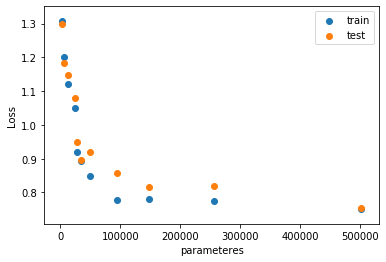

In [55]:
plt.scatter(para, train_loss_list,label="train")
plt.scatter(para, test_loss_list,label="test")
plt.ylabel('Loss')
plt.xlabel('parameteres')
plt.legend()
plt.show()

In [51]:
train_acc_list

[0.53518,
 0.57762,
 0.60774,
 0.6356,
 0.68438,
 0.69078,
 0.70684,
 0.73252,
 0.73134,
 0.73402,
 0.74248]

In [52]:
test_acc_list

[0.5361, 0.5877, 0.5926, 0.6219, 0.6781, 0.6906]

In [53]:
test_acc_list.append(0.6811)
test_acc_list.append(0.7019)
test_acc_list.append(0.7217)
test_acc_list.append(0.7149)
test_acc_list.append(0.7443)

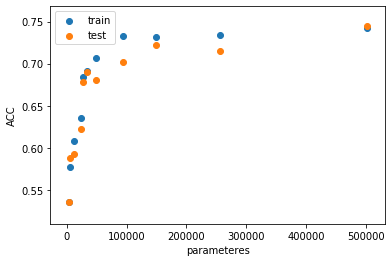

In [54]:
plt.scatter(para, train_acc_list,label="train")
plt.scatter(para, test_acc_list,label="test")
plt.ylabel('ACC')
plt.xlabel('parameteres')
plt.legend()
plt.show()